In [1]:
# header files
import glob
import csv
import numpy as np
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("Header files loaded!")

Header files loaded!


In [2]:
# hyper-parameters
is_ovarian_cancer = 1
is_cervix_cancer = 0
is_endometrial_cancer = 0

In [3]:
# load files
oc_files = (glob.glob("../results/oc_collagen_features/s_1/*"))
#cc_files = (glob.glob("../results/cc_collagen_features/s_1/*"))
#ec_files = (glob.glob("../results/ec_collagen_features/s_1/*"))
print(len(oc_files))
#print(len(cc_files))
#print(len(ec_files))

95


In [4]:
# collect features
if is_ovarian_cancer:
    collagen_features = []
    for file in oc_files:
        filename = file.split("/")[-1]
        flag = -1
        file_features = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_2/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_3/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_4/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_5/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_6/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_7/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_8/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/s_9/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)):
                        file_features.append(float(array[index]))
        collagen_features.append(file_features)

In [5]:
# Sepideh OC Spatil features
if is_ovarian_cancer:
    til_features = []
    censor = []
    days = []
    filenames = []
    flag = -1
    with open("../results/DATA_OC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
            else:
                array = row
            
                filenames.append(array[0])
                features = [float(array[5]), float(array[6]), float(array[7])]
                til_features.append(features)
            
                censor.append(bool(int(array[20])))
                days.append(int(array[23]))
    print(len(filenames))
    print(len(til_features))
    print(len(censor))
    print(len(days))
else:
    print("Not running for Ovarian Cancer Cases!")

103
103
103
103


In [6]:
# example of features collected
print(filenames[0])
print(til_features[0])
print(collagen_features[0])
print(censor[0])
print(days[0])

TCGA-23-1021
[-0.420431852, -0.429332933, -0.614347094]
[2.0773, 0.072555, 2.1027, 0.63186, 2.2962, 2.099, 0.069127, 2.1168, 0.52204, 2.3004, 2.1159, 0.074679, 2.1339, 0.55915, 2.2901, 2.131, 0.074034, 2.1554, 0.64197, 2.2891, 2.133, 0.074745, 2.1515, 0.63186, 2.2857, 2.1474, 0.079333, 2.1708, 0.67688, 2.2845, 2.1575, 0.071682, 2.1802, 0.92646, 2.2858, 2.1558, 0.077518, 2.1691, 0.6504, 2.2821, 2.1659, 0.075811, 2.1905, 1.0546, 2.2864]
True
1446


In [7]:
# Sepideh OC Spatil features and create output survival information for training model
if is_ovarian_cancer:
    final_til_features = []
    y = []
    event = []
    survival_time = []
    for file in oc_files:
        count = 0
        filename1 = file.split("/")[-1][:-4]
        for filename in filenames:
            filename2 = filename
            if filename1 == filename2:
                final_til_features.append(til_features[count])
                y.append([censor[count], days[count]])
                event.append(censor[count])
                survival_time.append(days[count])
            count += 1
    print(len(final_til_features))
    print(len(y))
    print(len(event))
    print(len(survival_time))
else:
    print("Not running for Ovarian Cancer Cases!")

95
95
95
95


In [8]:
# prognostic features obtained for OC cases
if is_ovarian_cancer:
    final_collagen_features = []
    index = 0
    for features in collagen_features:
        final_collagen_features.append([features[5], features[44], features[20], features[25], features[39], features[42], features[1]])
    print(len(final_collagen_features))
    print(len(final_collagen_features[0]))
else:
    final_collagen_features = collagen_features
    print(len(final_collagen_features))
    print(len(final_collagen_features[0]))

95
7


In [9]:
# generate training set for training model
features = []
for index in range(0, len(oc_files)):
    features.append(final_til_features[index]+final_collagen_features[index])
    #features.append(final_collagen_features[index])
    #features.append(final_til_features[index])
print(len(features))
print(len(features[0]))

95
10


In [10]:
# final training information to be used for training model
features = np.array(features)
y = np.array(y)
event = np.array(event)
survival_time = np.array(survival_time)

In [11]:
# main code for training
iter_scores = []
max_score = -1
max_train_index = []
max_test_index = []
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
prognostic_count = np.zeros(len(features[0]))
for iter in range(100):
    model_score = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(features):
        # get the training and testing set
        scaler = RobustScaler()
        features_train, features_test = features[train_index], features[test_index]
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        y_train, y_test = y[train_index], y[test_index]
        event_test, survival_time_test = event[test_index], survival_time[test_index]
        y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
        # remove highly correlated features
        features_train_df = pd.DataFrame(features_train)
        features_test_df = pd.DataFrame(features_test)
        
        # fit model
        estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
        estimator.fit(features_train_df, y_train)
        
        # score on validation set
        #score = estimator.score(features_test_df, y_test)
        score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
        model_score.append(score)
        if score > max_score:
            max_train_index = train_index
            max_test_index = test_index
            max_score = score
            
        # update prognostic count
        for index1 in range(0, len(estimator.coef_)):
            flag = -1
            for index2 in range(0, len(estimator.coef_[index1])):
                if estimator.coef_[index1][index2] > 0:
                    flag = 1
                    break
            if flag == 1:
                prognostic_count[index1] += 1
    
    if len(model_score) > 0:
        iter_scores.append(np.mean(model_score))
        max_score = max(max(model_score), max_score)
print(np.mean(iter_scores), np.std(iter_scores))
print(max_score)
print(prognostic_count)

0.7356423391057555 0.026957758485975637
1.0
[   0. 1000. 1000.    0.    0. 1000.    0. 1000. 1000.    4.]


(array([ 4.,  3.,  4.,  8., 17., 13., 20., 18.,  9.,  4.]),
 array([0.66474158, 0.67719644, 0.6896513 , 0.70210616, 0.71456102,
        0.72701588, 0.73947074, 0.7519256 , 0.76438046, 0.77683532,
        0.78929018]),
 <BarContainer object of 10 artists>)

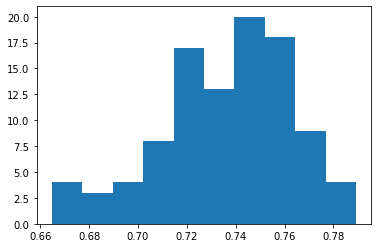

In [12]:
# histogram of c-indexes obtained after cross validation analysis
plt.hist(iter_scores, bins=10)

In [13]:
# run best model obtained from cross validation
scaler = RobustScaler()
features_train_final, features_val_final = features[max_train_index], features[max_test_index]
features_train_final = scaler.fit_transform(features_train_final)
features_val_final = scaler.transform(features_val_final)
y_train_final, y_val_final = y[max_train_index], y[max_test_index]
event_val_final, survival_time_val_final = event[max_test_index], survival_time[max_test_index]
y_train_final = np.array([tuple(row) for row in y_train_final], dtype=dt)
y_val_final = np.array([tuple(row) for row in y_val_final], dtype=dt)
        
# remove highly correlated features
features_train_df_final = pd.DataFrame(features_train_final)
features_val_df_final = pd.DataFrame(features_val_final)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df_final, y_train_final)
        
# score on validation set
score, _, _, _, _ = concordance_index_censored(event_val_final, survival_time_val_final, estimator.predict(features_val_df_final))
print(score)

1.0


In [14]:
# find prognostic features from best model trained above
count = 0
for index1 in range(0, len(estimator.coef_)):
    flag = -1
    for index2 in range(0, len(estimator.coef_[index1])):
        if estimator.coef_[index1][index2] > 0:
            flag = 1
            print(index1)
            break
    if flag == 1:
        count += 1
print()
print("Prognostic features count = " + str(count))

1
2
5
7
8

Prognostic features count = 5
